In [2]:
import pandas as pd

df = pd.read_csv("customer_segmentation_data.csv")
df.head()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


In [11]:
print("Shape of dataset:", df.shape)

print("\nInfo:")
print(df.info())

print("\nSummary statistics:")
print(df.describe())


Shape of dataset: (53503, 25)

Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53503 entries, 0 to 53502
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Customer ID                         53503 non-null  int64         
 1   Age                                 53503 non-null  int64         
 2   Gender                              53503 non-null  object        
 3   Marital Status                      53503 non-null  object        
 4   Education Level                     53503 non-null  object        
 5   Geographic Information              53503 non-null  object        
 6   Occupation                          53503 non-null  object        
 7   Income Level                        53503 non-null  int64         
 8   Behavioral Data                     53503 non-null  object        
 9   Purchase History                    53503 non-null  datet

In [14]:
print("Missing values in each column:\n", df.isnull().sum())
df['Age'] = df['Age'].fillna(df['Age'].median())
df = df.dropna(subset=['Income Level'])  

print("Duplicates found:", df.duplicated().sum())
df = df.drop_duplicates()

df['Income Level'] = pd.to_numeric(df['Income Level'], errors='coerce')

df['Gender'] = df['Gender'].str.strip().str.title()  

print("\nAfter cleaning:")
print(df.info())


Missing values in each column:
 Customer ID                               0
Age                                       0
Gender                                    0
Marital Status                            0
Education Level                           0
Geographic Information                    0
Occupation                                0
Income Level                              0
Behavioral Data                           0
Purchase History                          0
Interactions with Customer Service        0
Insurance Products Owned                  0
Coverage Amount                           0
Premium Amount                            0
Policy Type                               0
Customer Preferences                      0
Preferred Communication Channel           0
Preferred Contact Time                    0
Preferred Language                        0
Segmentation Group                        0
Age Group                                 0
Income Tier                               0


In [17]:
import numpy as np
from datetime import datetime

bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18–25', '26–35', '36–45', '46–55', '56–65', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df['Income Tier'] = pd.qcut(df['Income Level'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

df['Service Interaction'] = df['Interactions with Customer Service'].str.strip().str.lower()
interaction_map = {'phone': 0, 'chat': 1, 'email': 2, 'in-person': 3, 'text': 4}
df['Interaction Code'] = df['Service Interaction'].map(interaction_map)

df['Purchase History'] = pd.to_datetime(df['Purchase History'], errors='coerce')
current_date = pd.to_datetime("2025-06-06")  
df['Days Since Purchase'] = (current_date - df['Purchase History']).dt.days
df[['Age', 'Age Group', 'Income Level', 'Income Tier', 'Service Interaction', 'Interaction Code', 'Purchase History', 'Days Since Purchase']].head()


,Age,Age Group,Income Level,Income Tier,Service Interaction,Interaction Code,Purchase History,Days Since Purchase
0,23,18–25,70541,Medium,phone,0.0,2018-04-10,2614
1,26,26–35,54168,Medium,chat,1.0,2018-11-06,2404
2,29,26–35,73899,Medium,email,2.0,2021-06-05,1462
3,20,18–25,63381,Medium,chat,1.0,2018-09-02,2469
4,25,26–35,38794,Low,chat,1.0,2018-09-10,2461


Text(0, 0.5, 'Count')

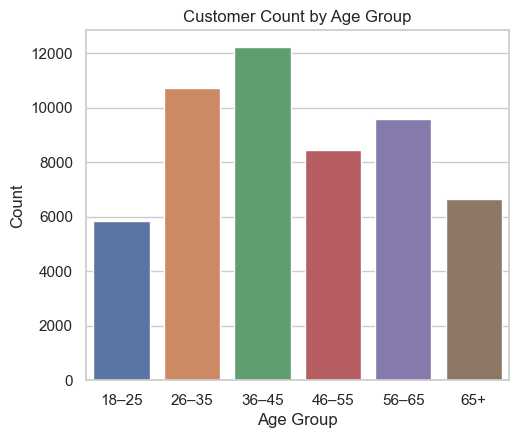

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='Age Group', data=df, order=['18–25', '26–35', '36–45', '46–55', '56–65', '65+'])
plt.title('Customer Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

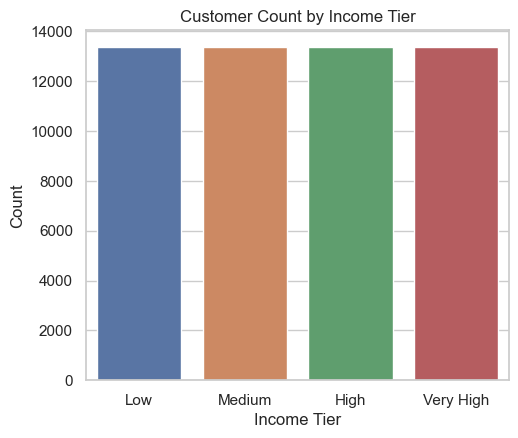

In [27]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 2)
sns.countplot(x='Income Tier', data=df, order=['Low', 'Medium', 'High', 'Very High'])
plt.title('Customer Count by Income Tier')
plt.xlabel('Income Tier')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

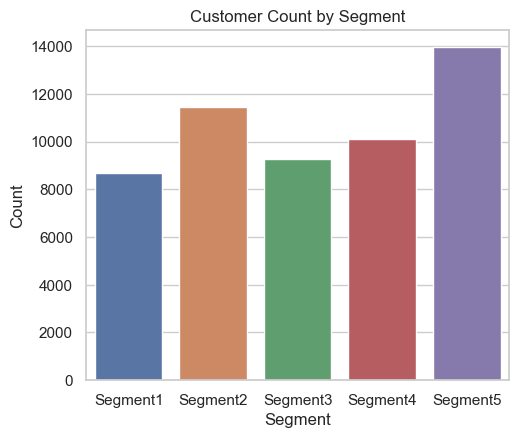

In [28]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 3)
sns.countplot(x='Segmentation Group', data=df, order=sorted(df['Segmentation Group'].unique()))
plt.title('Customer Count by Segment')
plt.xlabel('Segment')
plt.ylabel('Count')

C:\Users\Owner\AppData\Local\Temp\ipykernel_11132\4009183385.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Segmentation Group', y='Days Since Purchase', data=df, estimator='mean', ci=None)


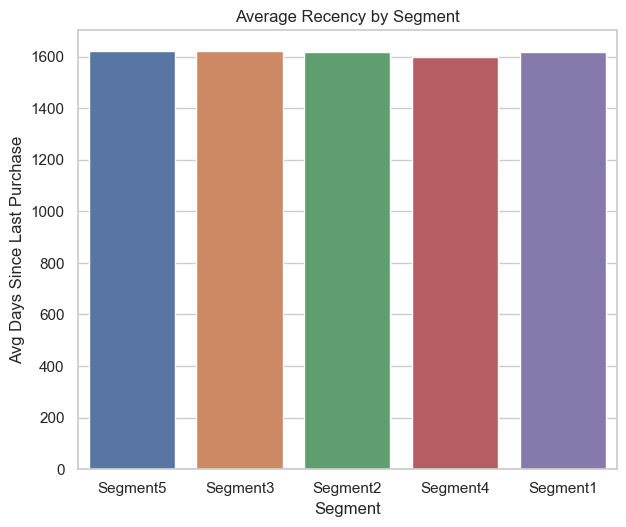

In [29]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 4)
sns.barplot(x='Segmentation Group', y='Days Since Purchase', data=df, estimator='mean', ci=None)
plt.title('Average Recency by Segment')
plt.xlabel('Segment')
plt.ylabel('Avg Days Since Last Purchase')

plt.tight_layout()
plt.show()